# Cancellation_booking

## Import Library

In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime
from sklearn.feature_selection import f_classif, mutual_info_regression, SelectKBest
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Import Database

In [199]:
path = "C:/Users/julia/Downloads/INNHotelsGroup.csv"
booking =  pd.read_csv(path)
booking

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
0,224,Offline,0,65.00,2,1,2017-10-02,0,2,Not_Canceled
1,5,Online,1,106.68,2,2,2018-11-06,0,3,Not_Canceled
2,1,Online,0,60.00,1,2,2018-02-28,0,1,Canceled
3,211,Online,0,100.00,2,0,2018-05-20,0,2,Canceled
4,48,Online,0,94.50,2,1,2018-04-11,0,1,Canceled
...,...,...,...,...,...,...,...,...,...,...
36270,85,Online,1,167.80,3,2,2018-08-03,0,6,Not_Canceled
36271,228,Online,2,90.95,2,1,2018-10-17,0,3,Canceled
36272,148,Online,2,98.39,2,2,2018-07-01,0,6,Not_Canceled
36273,63,Online,0,94.50,2,0,2018-04-21,0,3,Canceled


In [200]:
booking

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
0,224,Offline,0,65.00,2,1,2017-10-02,0,2,Not_Canceled
1,5,Online,1,106.68,2,2,2018-11-06,0,3,Not_Canceled
2,1,Online,0,60.00,1,2,2018-02-28,0,1,Canceled
3,211,Online,0,100.00,2,0,2018-05-20,0,2,Canceled
4,48,Online,0,94.50,2,1,2018-04-11,0,1,Canceled
...,...,...,...,...,...,...,...,...,...,...
36270,85,Online,1,167.80,3,2,2018-08-03,0,6,Not_Canceled
36271,228,Online,2,90.95,2,1,2018-10-17,0,3,Canceled
36272,148,Online,2,98.39,2,2,2018-07-01,0,6,Not_Canceled
36273,63,Online,0,94.50,2,0,2018-04-21,0,3,Canceled


In [201]:
booking.booking_status.value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

## Clean and Organize the data

In [202]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   lead_time                   36275 non-null  int64  
 1   market_segment_type         36275 non-null  object 
 2   no_of_special_requests      36275 non-null  int64  
 3   avg_price_per_room          36275 non-null  float64
 4   no_of_adults                36275 non-null  int64  
 5   no_of_weekend_nights        36275 non-null  int64  
 6   arrival_date                36275 non-null  object 
 7   required_car_parking_space  36275 non-null  int64  
 8   no_of_week_nights           36275 non-null  int64  
 9   booking_status              36275 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 2.8+ MB


In [203]:
# no missing data
booking.isna().sum()

lead_time                     0
market_segment_type           0
no_of_special_requests        0
avg_price_per_room            0
no_of_adults                  0
no_of_weekend_nights          0
arrival_date                  0
required_car_parking_space    0
no_of_week_nights             0
booking_status                0
dtype: int64

In [204]:
booking.describe()

,lead_time,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,85.232557,0.619655,103.423539,1.844962,0.810724,0.030986,2.204300
std,85.930817,0.786236,35.089424,0.518715,0.870644,0.173281,1.410905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,80.300000,2.000000,0.000000,0.000000,1.000000
50%,57.000000,0.000000,99.450000,2.000000,1.000000,0.000000,2.000000
75%,126.000000,1.000000,120.000000,2.000000,2.000000,0.000000,3.000000
max,443.000000,5.000000,540.000000,4.000000,7.000000,1.000000,17.000000


In [205]:
# # transform target from object to numerical type
# le = LabelEncoder()
# # apply can only use in multiply dimension array, not in one dimension array 
# # booking['booking_status'] = booking.loc[:,['booking_status']].apply(le.fit_transform)
# booking['booking_status'] = le.fit_transform(booking['booking_status'])
# booking

In [197]:
booking1 = booking.copy()

In [208]:
# change the arrival-date to date type
booking1['arrival_date'] = pd.to_datetime(booking1['arrival_date'])
booking1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   lead_time                   36275 non-null  int64         
 1   market_segment_type         36275 non-null  int32         
 2   no_of_special_requests      36275 non-null  int64         
 3   avg_price_per_room          36275 non-null  float64       
 4   no_of_adults                36275 non-null  int64         
 5   no_of_weekend_nights        36275 non-null  int64         
 6   arrival_date                36275 non-null  datetime64[ns]
 7   required_car_parking_space  36275 non-null  int64         
 8   no_of_week_nights           36275 non-null  int64         
 9   booking_status              36275 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(6)
memory usage: 2.5 MB


In [209]:
# change market_segment_type and target from object type to numerical type
le = LabelEncoder()
object_type = booking1.select_dtypes('object').columns
booking1[object_type] = booking1.select_dtypes('object').apply(le.fit_transform)

## Visualize the Data

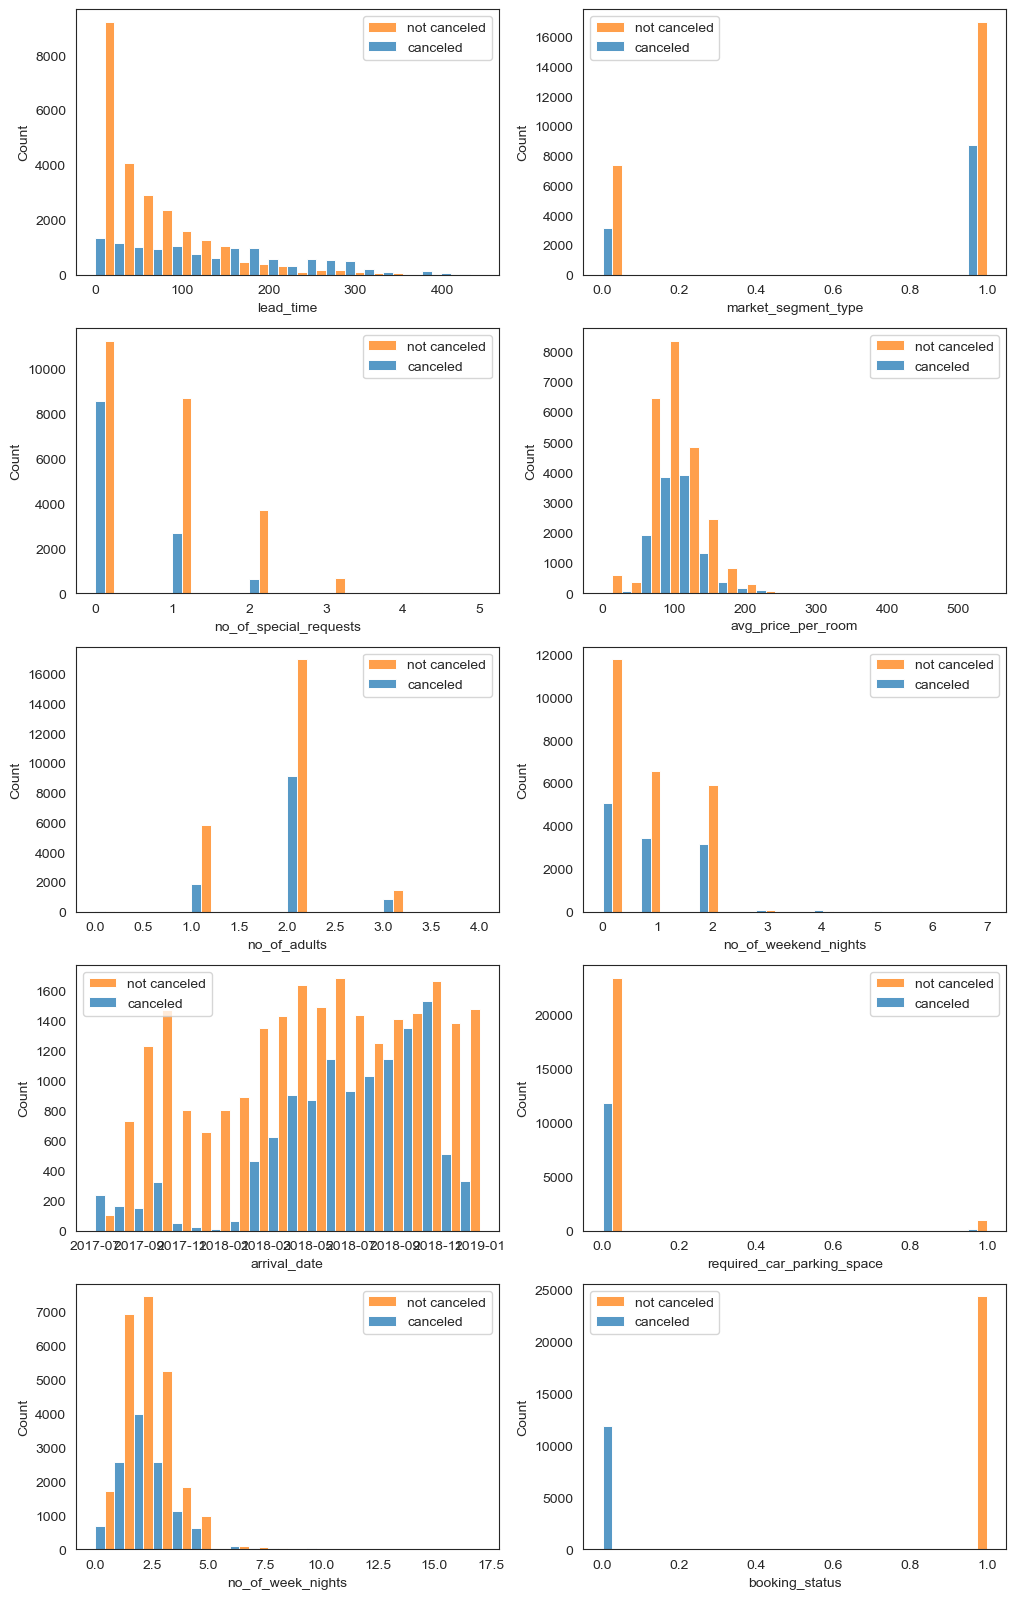

In [244]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (12, 20))
axes = np.ravel(axes)
for i,j in enumerate(booking1.columns):
  sns.axes_style('white')
  p1 = sns.histplot(data = booking1, x = j, hue ='booking_status',multiple = 'dodge', bins = 20, ax = axes[i])
  p1.legend(['not canceled', 'canceled'])
plt.show()


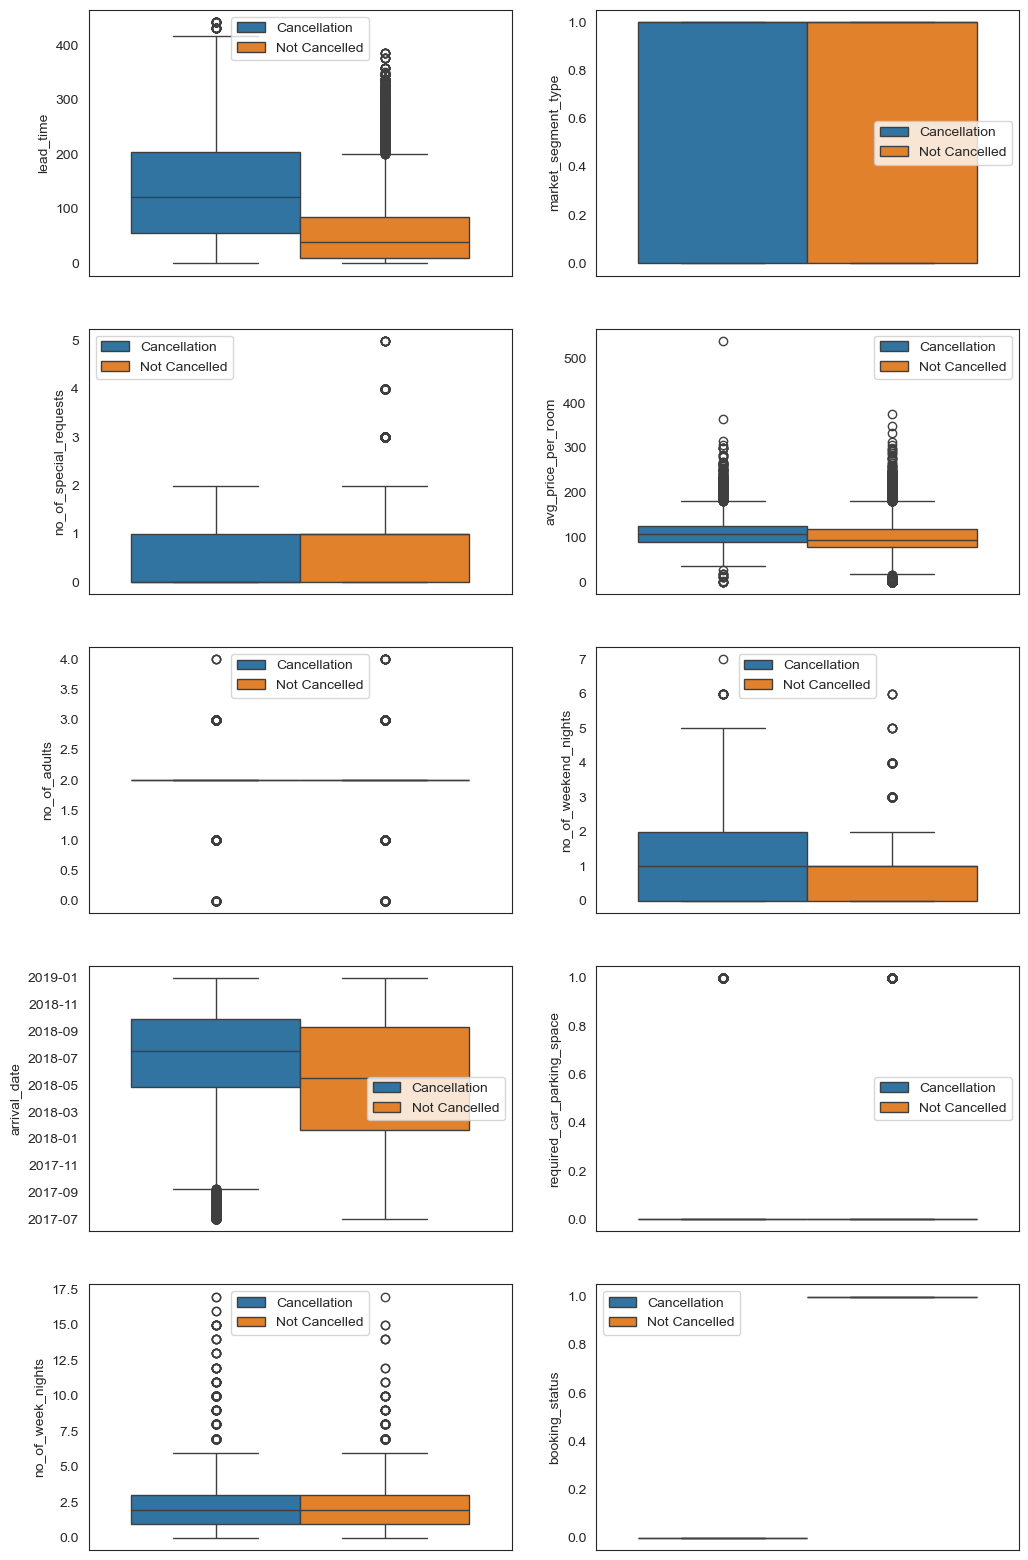

In [211]:

dict_labels = {0:'Cancellation', 1:'Not Cancelled'}
col_keys, col_names = list(dict_labels.keys()), list(dict_labels.values())
# visualize each feature in dataset
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (12, 20))
axes = np.ravel(axes)
for i,j in enumerate(booking1.columns):
  sns.axes_style('white')
  p1 = sns.boxplot(data = booking1, y = j, hue ='booking_status', ax = axes[i])
  handles, _ = p1.get_legend_handles_labels()
  p1.legend(handles, col_names)
plt.show()

## Analyze the dataset 

<!-- accoring to the plot seems that:
1. arrival_date is very import, time during : 2018-01 to 2018-09 are easily to cancell booking;
2. market segment type is also very import;
3. number of adults is also very import;
-->

In [288]:
# add year and month and the date of the datetime in the data 
booking1['year'] = booking1['arrival_date'].dt.year
booking1['month'] = booking1['arrival_date'].dt.month
booking1['week'] = booking1['arrival_date'].dt.day_of_week
booking1

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,year,month,week
0,224,0,0,65.00,2,1,2017-10-02,0,2,1,2017,10,0
1,5,1,1,106.68,2,2,2018-11-06,0,3,1,2018,11,1
2,1,1,0,60.00,1,2,2018-02-28,0,1,0,2018,2,2
3,211,1,0,100.00,2,0,2018-05-20,0,2,0,2018,5,6
4,48,1,0,94.50,2,1,2018-04-11,0,1,0,2018,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,85,1,1,167.80,3,2,2018-08-03,0,6,1,2018,8,4
36271,228,1,2,90.95,2,1,2018-10-17,0,3,0,2018,10,2
36272,148,1,2,98.39,2,2,2018-07-01,0,6,1,2018,7,6
36273,63,1,0,94.50,2,0,2018-04-21,0,3,0,2018,4,5


## Standardize the dataset

In [379]:
# do not standized the target, because logistic regression need the target integer
booking2 = booking1.copy()
booking2 = booking1.drop(columns = ['arrival_date', 'booking_status'])
std = StandardScaler()
# standardize the dataset without target
booking2.iloc[:,:] = std.fit_transform(booking2.iloc[:,:])
booking2['booking_status'] = booking1['booking_status']

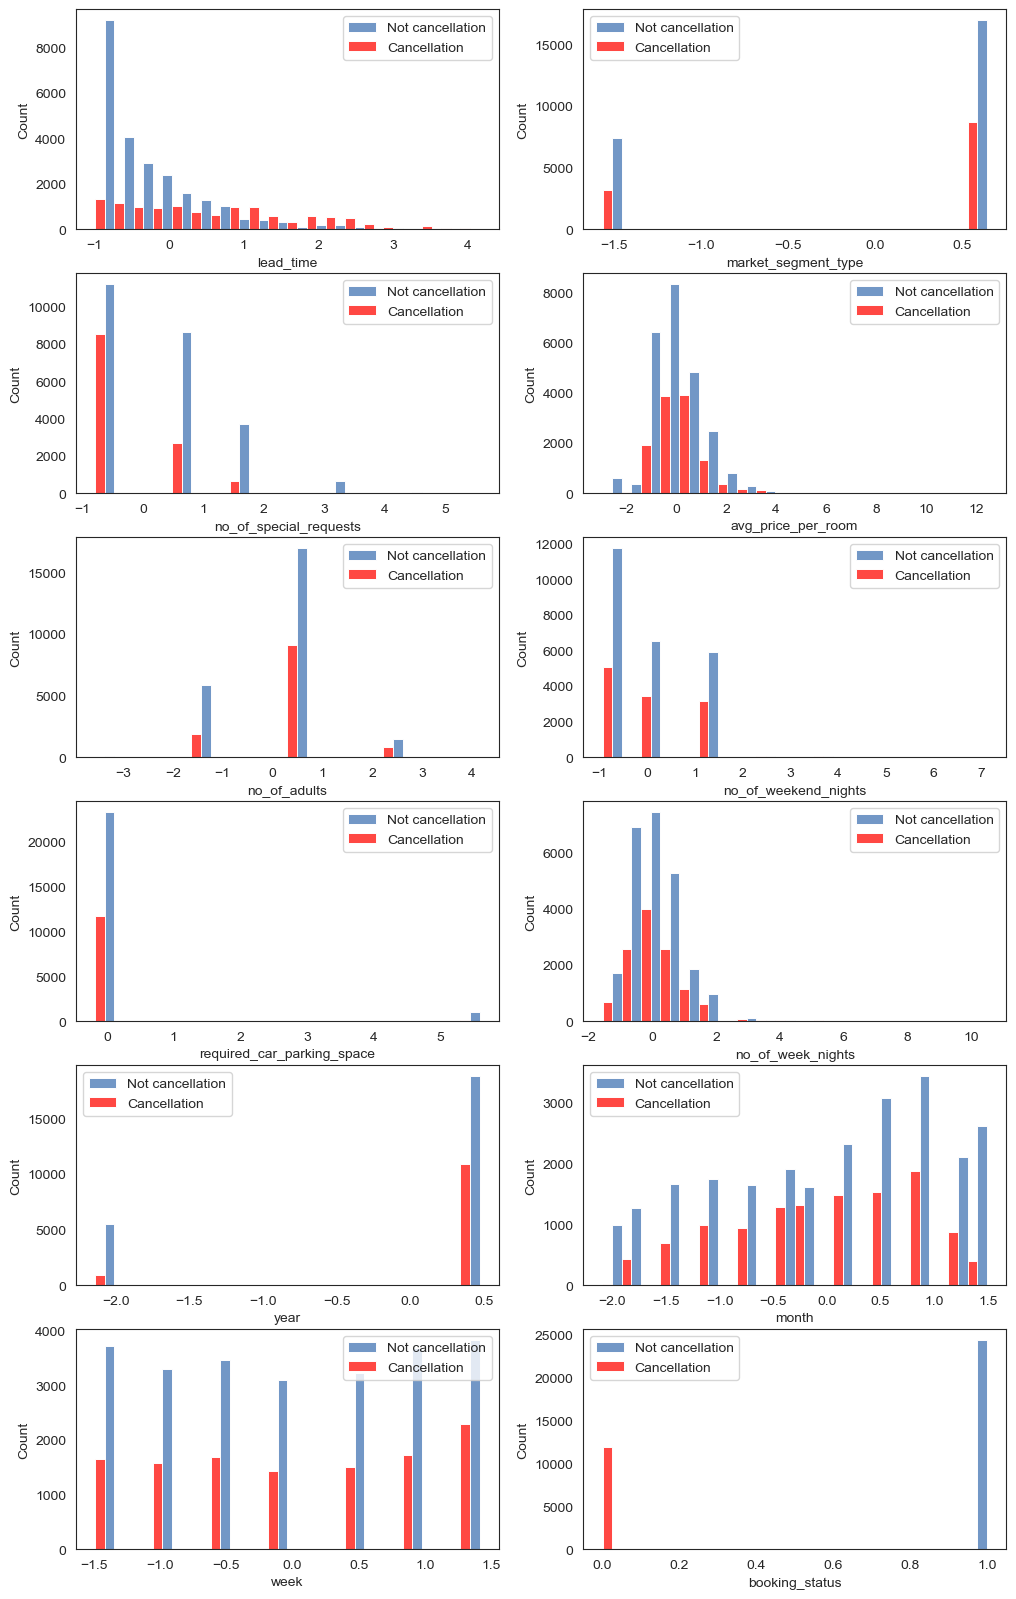

In [380]:
# visualize the dataset after standardized 
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (12, 20))
axes = np.ravel(axes)
for i,j in enumerate(booking2.columns):
  sns.histplot(data = booking2, x = j, ax = axes[i], hue = 'booking_status',bins = 20, palette = ["#FF0B04", "#4374B3"], multiple = 'dodge')
  axes[i].legend(labels = ['Not cancellation','Cancellation'])
plt.show()

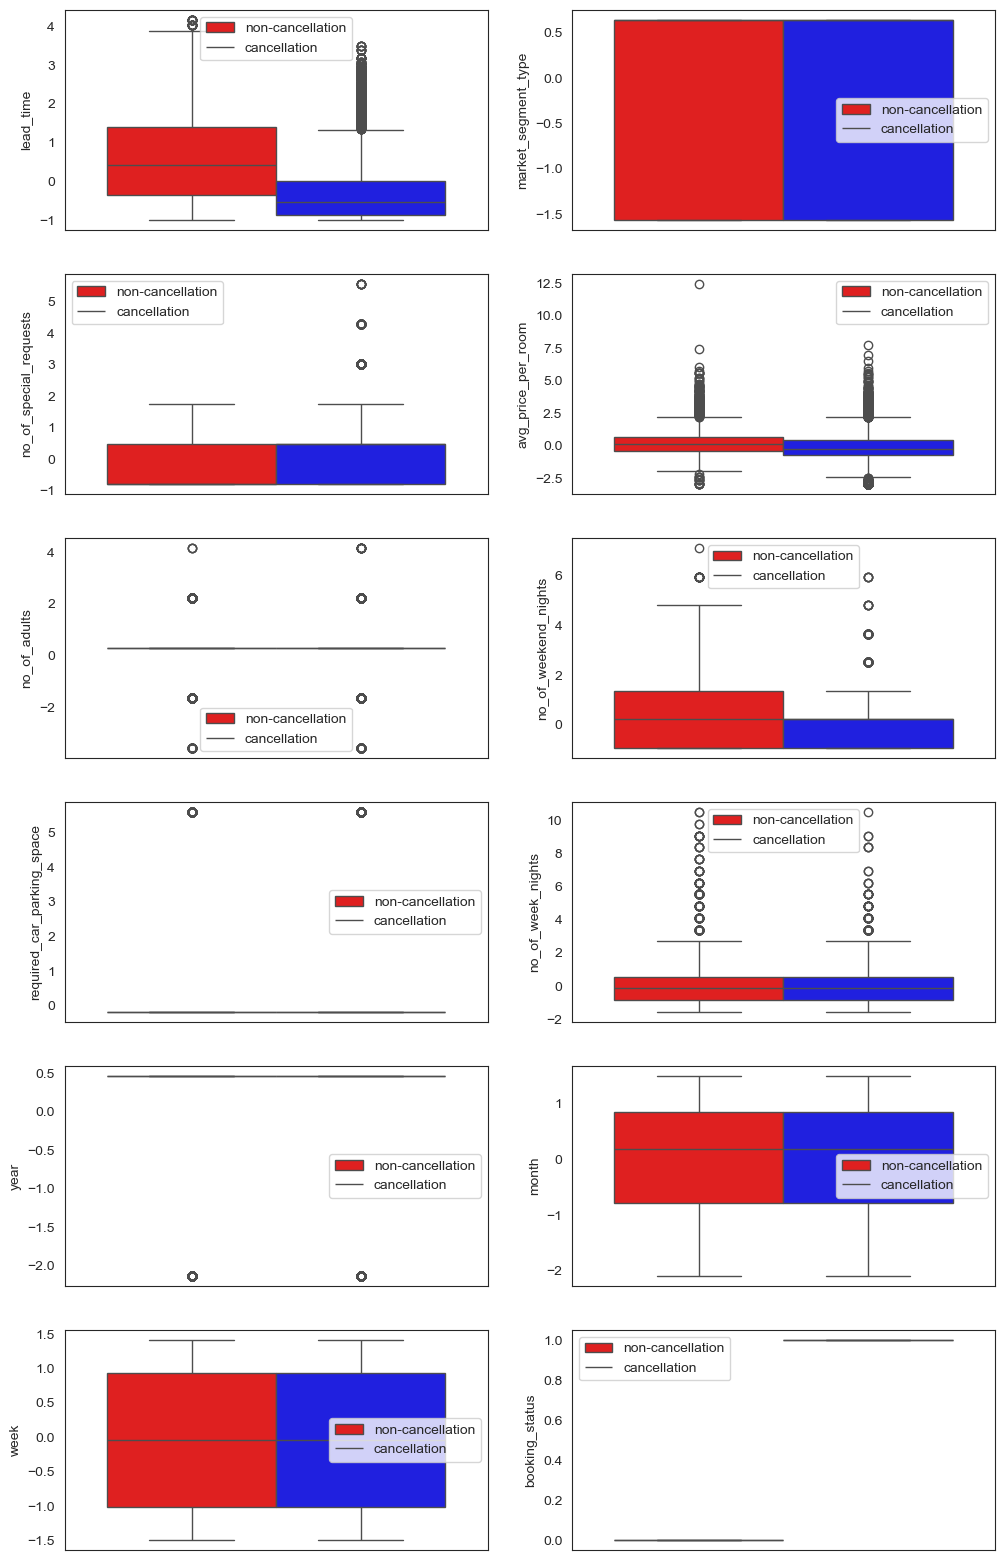

In [381]:
# plot the boxplot so that we ca see the outliers
fig, axes = plt.subplots(6,2, figsize = (12, 20))
axes = np.ravel(axes)
for i, j in enumerate(booking2.columns):
  sns.boxplot(data = booking2, y = j, hue = 'booking_status',palette = ['red', 'blue'], ax = axes[i])
  axes[i].legend(['non-cancellation', 'cancellation'])
plt.show()

## Analyze the features

In [382]:
# check weather the data is balenced
booking2.booking_status.value_counts()

1    24390
0    11885
Name: booking_status, dtype: int64

In [383]:
# feature selection 
# use person correlation to select related feature 
cor = booking2.corr()['booking_status']
cor = cor.drop(labels = 'booking_status')
mean_cor = cor.abs().mean()
len_cor = len(cor)

cor 

lead_time                    -0.438538
market_segment_type          -0.038351
no_of_special_requests        0.253070
avg_price_per_room           -0.142569
no_of_adults                 -0.086920
no_of_weekend_nights         -0.061563
required_car_parking_space    0.086185
no_of_week_nights            -0.092996
year                         -0.179529
month                         0.011233
week                         -0.030458
Name: booking_status, dtype: float64

In [384]:
# select the vaulable features
value_features = []
for i in cor.index:
  if abs(cor[i]) >= mean_cor:
    value_features.append(i)
value_features

['lead_time', 'no_of_special_requests', 'avg_price_per_room', 'year']

In [385]:
# using the vaulable features for our new data
booking3_X = booking2[value_features]
booking3_y = booking2['booking_status']


### Split the data into traing and testing

In [386]:
booking3_X_train, booking3_X_test, booking3_y_train, booking3_y_test = train_test_split(booking3_X, booking3_y, test_size = 0.3)


## Logistic Regression

In [387]:
# train the model
lr = LogisticRegression()
lr.fit(X = booking3_X_train, y = booking3_y_train)


LogisticRegression()

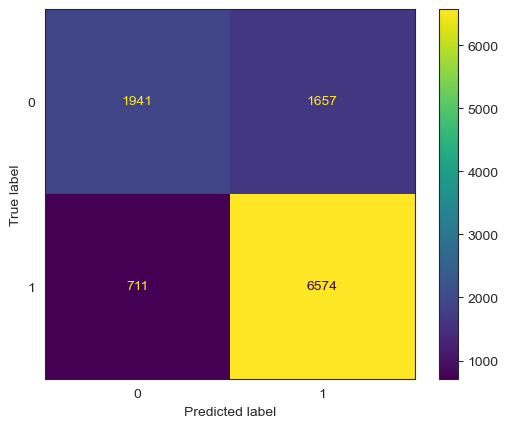

In [392]:
# predict the result 
pred = lr.predict(X = booking3_X_test)
#  show the confusion metrics
cm = confusion_matrix(y_true = booking3_y_test, y_pred = pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [393]:
# calculate the accuracy
print(classification_report(y_true = booking3_y_test, y_pred = pred))

              precision    recall  f1-score   support

           0       0.73      0.54      0.62      3598
           1       0.80      0.90      0.85      7285

    accuracy                           0.78     10883
   macro avg       0.77      0.72      0.73     10883
weighted avg       0.78      0.78      0.77     10883



## Calculate the possiblity 

In [400]:
PRO = lr.predict_proba(X = booking3_X_test)